**Outlier: An oulier is a data point which differs significantly from other observations in a dataset.**<br>
**If we have an outlier (a very large or very small number), it pulls the mean and SD away from the “true” mean and spread.**

# Detecting Outliers: Statistical methods

i) Z-score Method: If ∣Z∣>3 → Outlier  
                   x>Mean-3*SD  OR x<Mean+3SD is considered as oultlier.

Because according to normal distribution properties 99.7% of data lies within range of [ x>Mean-3*SD , x<Mean+3SD ] and only 0.3% of data lies beyond this.<br>
Z-score method works well with only normally distributed data.

In [51]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv(" ") # path to placement.csv file

In [55]:
df.sample(5)

,cgpa,placement_exam_marks,placed
329,7.30,35.0,0
660,5.97,26.0,1
804,6.49,81.0,0
389,5.90,16.0,1
490,7.34,32.0,0


In [57]:
Mean=df['cgpa'].mean()
SD=df['cgpa'].std()
print(Mean)
print(SD)

6.96124
0.6158978751323896


In [65]:
lower_boundary=Mean-3*SD
upper_boundary=Mean+3*SD
print(lower_boundary)
print(upper_boundary)

5.113546374602832
8.808933625397168


In [73]:
outliers=df[(df['cgpa']<lower_boundary) | (df['cgpa']>upper_boundary)]
print(outliers)

     cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1


**ii) IQR-method (Interquartile Range)**

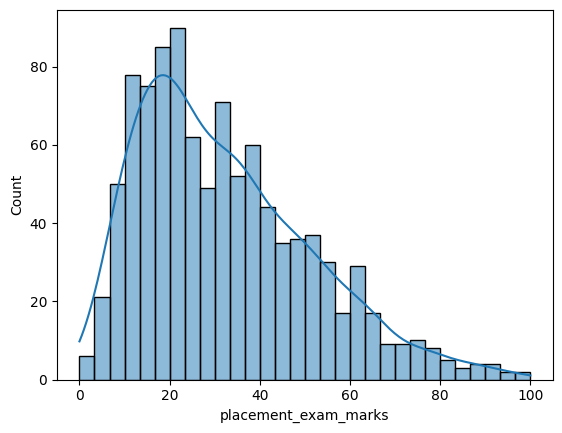

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['placement_exam_marks'], bins=30, kde=True) #KDE=Kernel Density Estimate ( the blue line drawn over bars)
plt.show()


**So the column placement_exam_marks contains skewed data i.e right skewed..so we can use IQR method to detect outliers.**

In [208]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

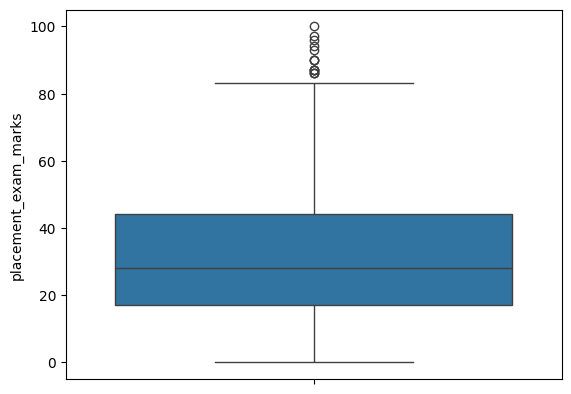

In [210]:
sns.boxplot(df['placement_exam_marks'])

In [324]:
#Finding 25th percentile and 75th percentile values

Q1= df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
print(Q1)
print(Q3)
#A quantile is just a value that splits data at a certain percentage point.

17.0
44.0


In [326]:
#Calculating IQR
IQR=Q3-Q1
print(IQR)

27.0


In [328]:
#Calculate boundaries

lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
print(lower_boundary)
print(upper_boundary)

-23.5
84.5


In [330]:
#Detecting outliers
outliers=df[(df['placement_exam_marks']<lower_boundary) | (df['placement_exam_marks']>upper_boundary)]
print(outliers)

     cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0


**NOTE: Are this really ouliers? Answer is actually context-based... this are actually marks which in real we dont considered as outliers,they are just extreme values , not wrong values...but for understanding purpose we took this example..<br> IQR is mathematical, not contextual**

In [266]:
filtered_data = df[(df['placement_exam_marks'] >= lower_boundary) &
                   (df['placement_exam_marks'] <= upper_boundary)]

In [268]:
print(filtered_data.shape)

(985, 3)


<Axes: ylabel='placement_exam_marks'>

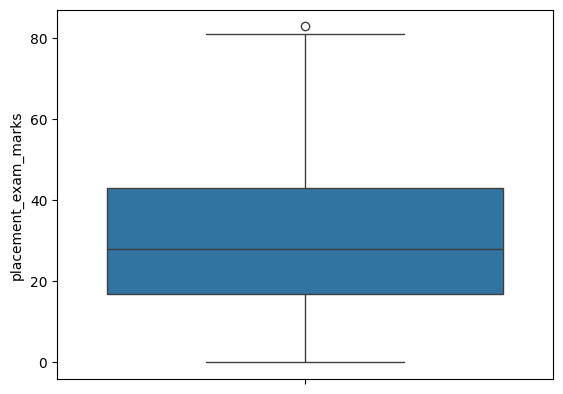

In [270]:
sns.boxplot(filtered_data['placement_exam_marks'])

# Handling Outliers

**i) Trimming - in this method, we completely drop rows with extreme outliers<br>
     Use when:<br>
     Outliers are caused by data entry error <br>
     Dataset is large enough so, removing a few rows wont affect much.**

In [40]:
import pandas as pd

data = {"Score": [45, 50, 52, 48, 49, 47, 51, 250]}  # 250 is an outlier,assuming its a data entry error
df = pd.DataFrame(data)

# Calculate IQR
Q1 = df["Score"].quantile(0.25)
Q3 = df["Score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR


# Dropping (Trimming method)
df_trimmed = df[(df["Score"] >= lower_bound) & (df["Score"] <= upper_bound)]

print(df_trimmed)

   Score
0     45
1     50
2     52
3     48
4     49
5     47
6     51


**ii)Capping(Winsorization)<br>
      Instead of deleting we cap(limit) them to a threshold.<br>
      Any value above upper limit is replaced with upper limit value.<br>
      Any value below lower limit is replaced with lower limit value.**

In [141]:
data=pd.read_csv(r"C:\Users\Jaykr\Downloads\weight-height.csv")

In [143]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

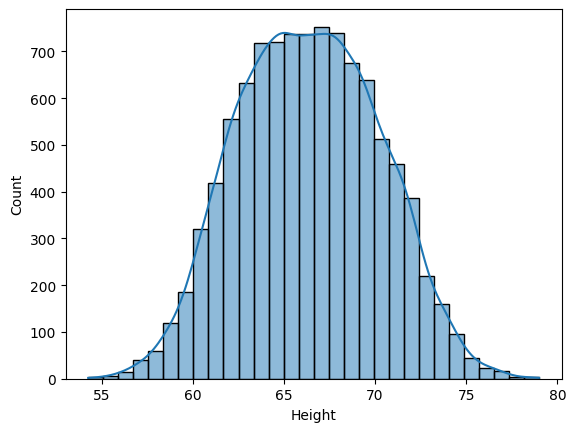

In [145]:
import seaborn as sns
sns.histplot(data['Height'], bins=30, kde=True)

<Axes: ylabel='Height'>

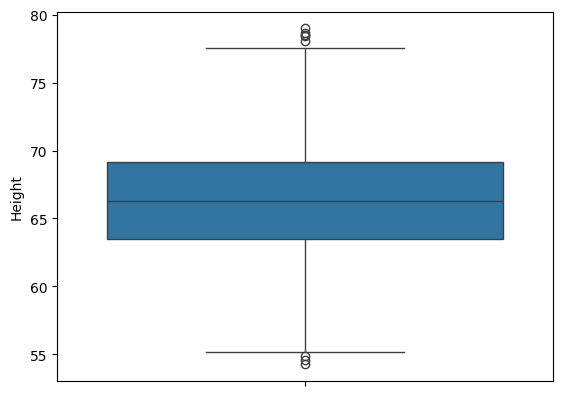

In [147]:
sns.boxplot(data['Height'])

In [149]:
Q1= data['Height'].quantile(0.25)
Q3=data['Height'].quantile(0.75)
print(Q1)
print(Q3)
IQR=Q3-Q1
print(IQR)
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
print(lower_boundary)
print(upper_boundary)

63.505620481218955
69.1742617268347
5.668641245615746
55.00265861279534
77.67722359525831


In [151]:
data['Height']=np.where(data['Height'] >= upper_boundary , upper_boundary, 
                    np.where(data['Height'] <=lower_boundary, lower_boundary,data['Height']))

<Axes: ylabel='Height'>

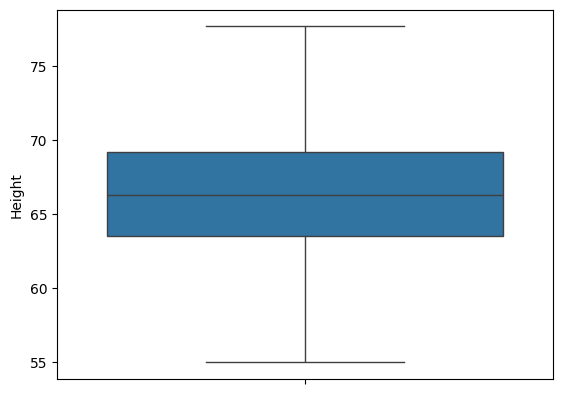

In [153]:
sns.boxplot(data['Height'])
